In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

plt.rc('font',family='NanumGothic ECO')
plt.rc('axes',unicode_minus=False)

In [4]:
df = pd.read_csv("/home/piai/second_week/2. Big Data 분석/SCALE불량.csv", encoding='euc-kr')
df

,plate_no,rolling_date,scale,spec_long,spec_country,steel_kind,pt_thick,pt_width,pt_length,hsb,...,fur_input_row,fur_heat_temp,fur_heat_time,fur_soak_temp,fur_soak_time,fur_total_time,rolling_method,rolling_temp,descaling_count,work_group
0,PLT_1001,03JAN2023:07:07:53,양품,AB/EH32-TM,미국,T,32,3700,15100,적용,...,1열,1144,116,1133,59,259,TMCP(온도제어),934,8,1조
1,PLT_1002,03JAN2023:07:21:22,양품,AB/EH32-TM,미국,T,32,3700,15100,적용,...,2열,1144,122,1135,53,238,TMCP(온도제어),937,8,1조
2,PLT_1003,03JAN2023:07:31:15,양품,NV-E36-TM,영국,T,33,3600,19200,적용,...,1열,1129,116,1121,55,258,TMCP(온도제어),889,8,1조
3,PLT_1004,03JAN2023:07:41:01,양품,NV-E36-TM,영국,T,33,3600,19200,적용,...,2열,1152,125,1127,68,266,TMCP(온도제어),885,8,1조
4,PLT_1005,03JAN2023:07:52:40,양품,BV-EH36-TM,프랑스,T,38,3100,13300,적용,...,1열,1140,134,1128,48,246,TMCP(온도제어),873,8,1조
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,PLT_1996,10JAN2023:05:32:25,양품,BV-A,프랑스,C,19,3400,41500,적용,...,2열,1142,55,1151,86,203,CR(제어압연),948,10,4조
996,PLT_1997,10JAN2023:05:39:19,양품,LR-A,영국,C,19,3400,41500,적용,...,2열,1142,55,1151,86,209,CR(제어압연),948,10,4조
997,PLT_1998,10JAN2023:05:52:41,양품,AB/AH32,미국,C,17,3400,43700,적용,...,2열,1169,65,1163,77,227,CR(제어압연),948,10,4조
998,PLT_1999,10JAN2023:06:01:50,양품,NV-A32,영국,C,17,3400,43700,적용,...,2열,1169,65,1163,77,204,CR(제어압연),948,10,4조


A131-DH36TM     1
A283-C          6
A516-60         3
A709-36         1
AB/A           51
               ..
NV-E32-TM       2
NV-E36-TM       5
PILAC-BT33     40
SA283-C        21
V42JBN3         4
Name: spec_long, Length: 66, dtype: int64


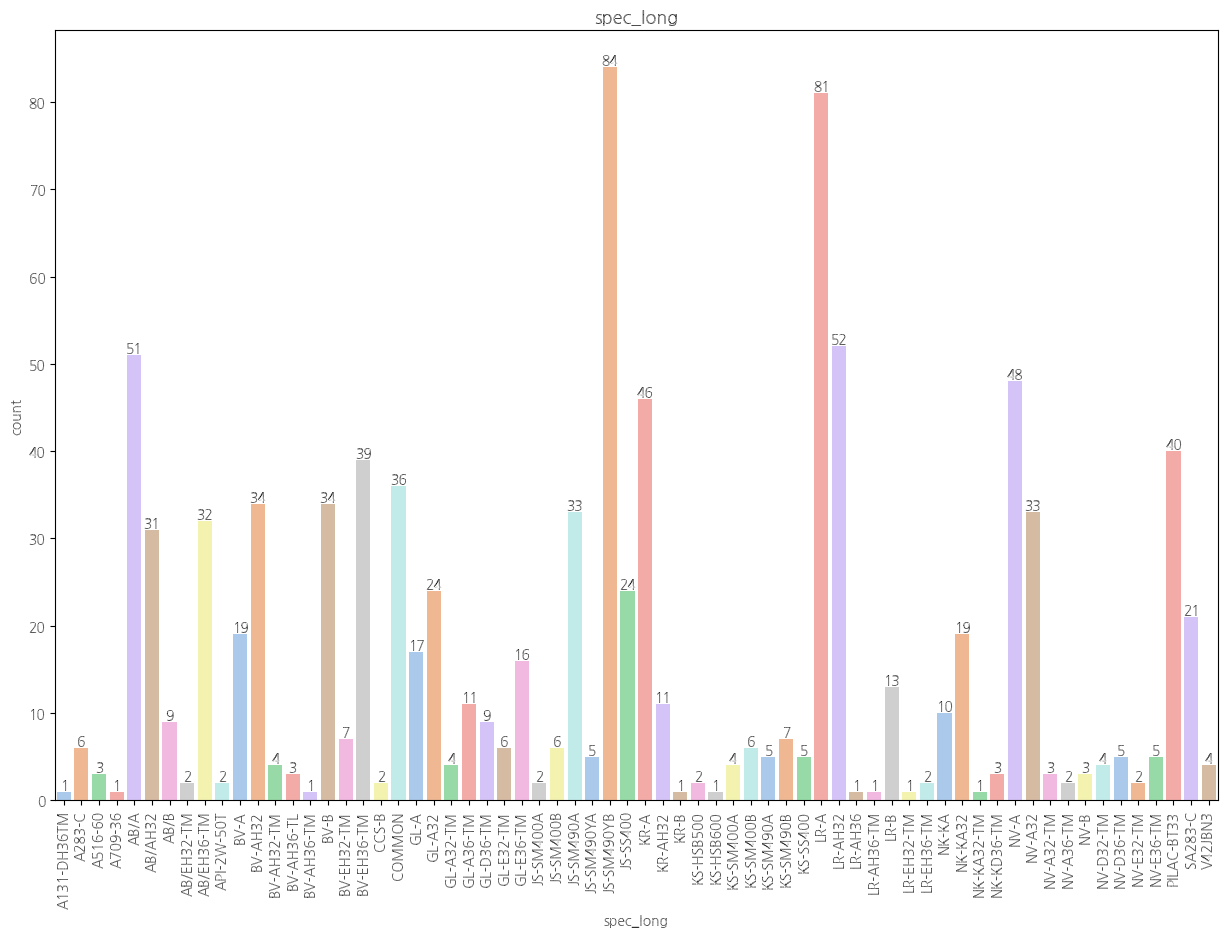

In [39]:
plc_counts = df['spec_long'].value_counts().sort_index()
print(plc_counts)

fig, ax = plt.subplots(figsize=(15, 10))

colors = sns.color_palette("pastel", len(plc_counts))

p1 = sns.countplot(x='spec_long', data=df, ax=ax, palette=colors, order=plc_counts.index)
ax.bar_label(p1.containers[0], fmt='%d') 

ax.set_title('spec_long', fontsize=13)
plt.xticks(rotation=90)

plt.show()


공통      36
독일      87
미국     159
영국     256
일본     187
프랑스    143
한국     132
Name: spec_country, dtype: int64


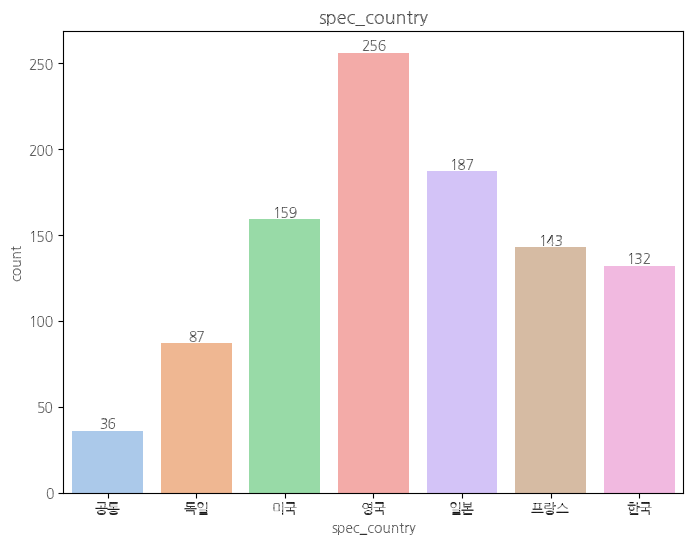

In [40]:
plc_counts = df['spec_country'].value_counts().sort_index()
print(plc_counts)

fig, ax = plt.subplots(figsize=(8, 6))

colors = sns.color_palette("pastel", len(plc_counts))

p2 = sns.countplot(x='spec_country', data=df, ax=ax, palette=colors, order=plc_counts.index)
ax.bar_label(p2.containers[0], fmt='%d') 

ax.set_title('spec_country', fontsize=13)

plt.show()

<Axes: xlabel='spec_country', ylabel='count'>

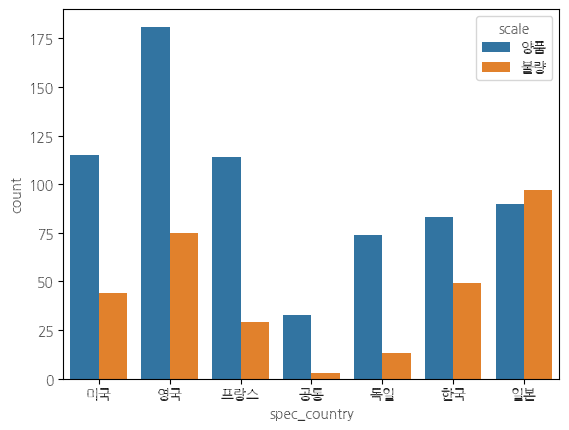

In [22]:
sns.countplot(x='spec_country', hue='scale', data=df)

불량    310
양품    690
Name: scale, dtype: int64


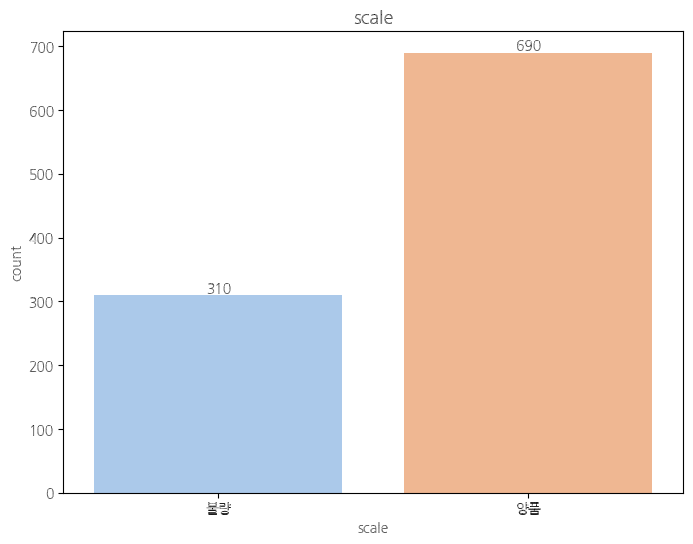

In [41]:
plc_counts = df['scale'].value_counts().sort_index()
print(plc_counts)

fig, ax = plt.subplots(figsize=(8, 6))

colors = sns.color_palette("pastel", len(plc_counts))

p3 = sns.countplot(x='scale', data=df, ax=ax, palette=colors, order=plc_counts.index)
ax.bar_label(p3.containers[0], fmt='%d') 

ax.set_title('scale', fontsize=13)

plt.show()

C    755
T    245
Name: steel_kind, dtype: int64


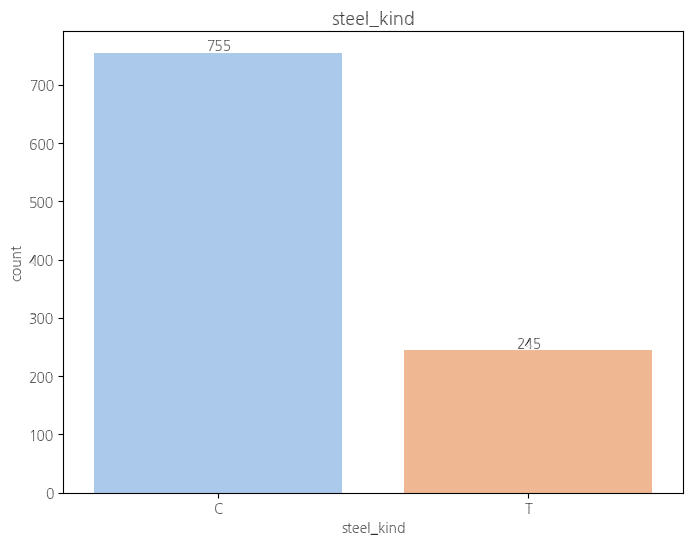

In [72]:
plc_counts = df['steel_kind'].value_counts().sort_index()
print(plc_counts)

fig, ax = plt.subplots(figsize=(8, 6))

colors = sns.color_palette("pastel", len(plc_counts))

p4 = sns.countplot(x='steel_kind', data=df, ax=ax, palette=colors, order=plc_counts.index)
ax.bar_label(p4.containers[0], fmt='%d') 

ax.set_title('steel_kind', fontsize=13)

plt.show()

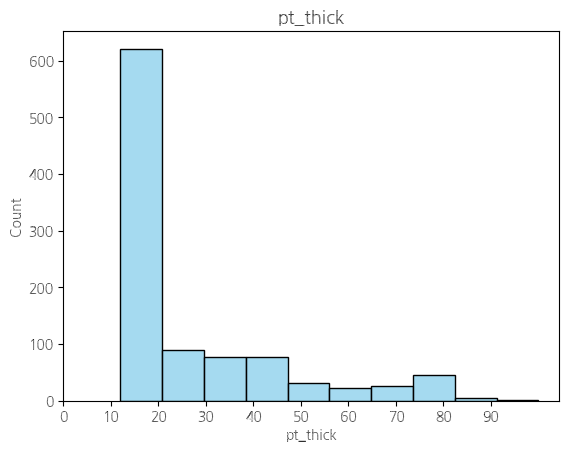

In [51]:
sns.histplot(data=df, x='pt_thick', bins=10,  color="skyblue")
plt.title('pt_thick', fontsize=13)
plt.xticks(np.arange(0, 100, 10))
plt.show()

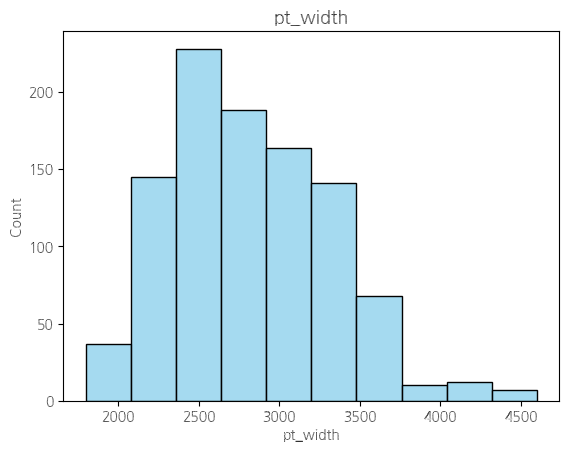

In [49]:
sns.histplot(data=df, x='pt_width', bins=10,  color="skyblue")
plt.title('pt_width', fontsize=13)
plt.show()

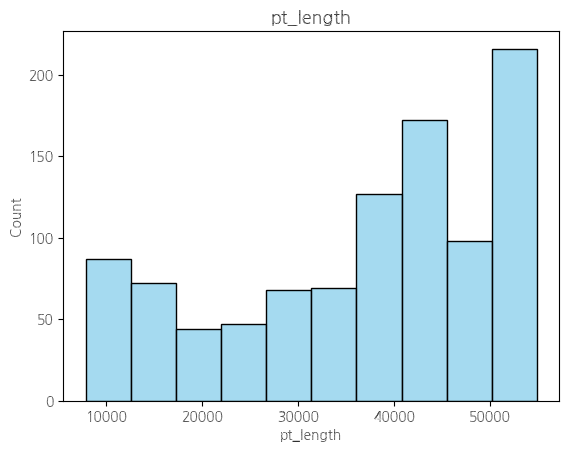

In [64]:
sns.histplot(data=df, x='pt_length', bins=10,  color="skyblue")
plt.title('pt_length', fontsize=13)
plt.show()

미적용     47
적용     953
Name: hsb, dtype: int64


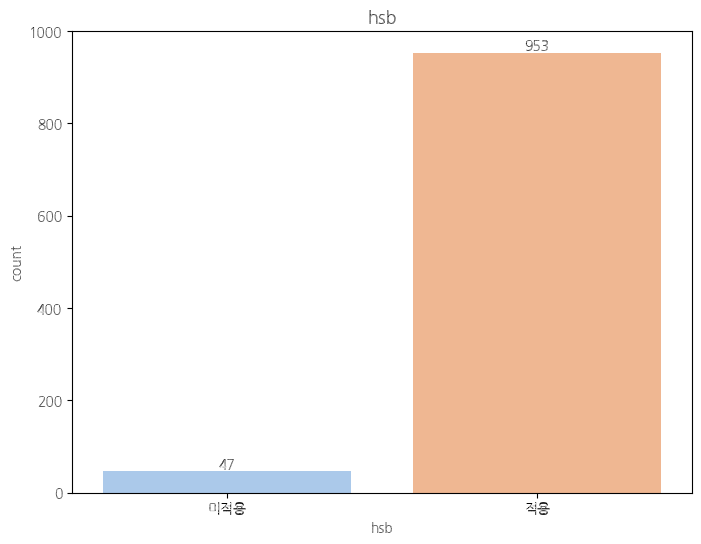

In [55]:
plc_counts = df['hsb'].value_counts().sort_index()
print(plc_counts)

fig, ax = plt.subplots(figsize=(8, 6))

colors = sns.color_palette("pastel", len(plc_counts))

p5 = sns.countplot(x='hsb', data=df, ax=ax, palette=colors, order=plc_counts.index)
ax.bar_label(p5.containers[0], fmt='%d') 

ax.set_title('hsb', fontsize=13)

plt.show()

1호기    333
2호기    325
3호기    342
Name: fur_no, dtype: int64


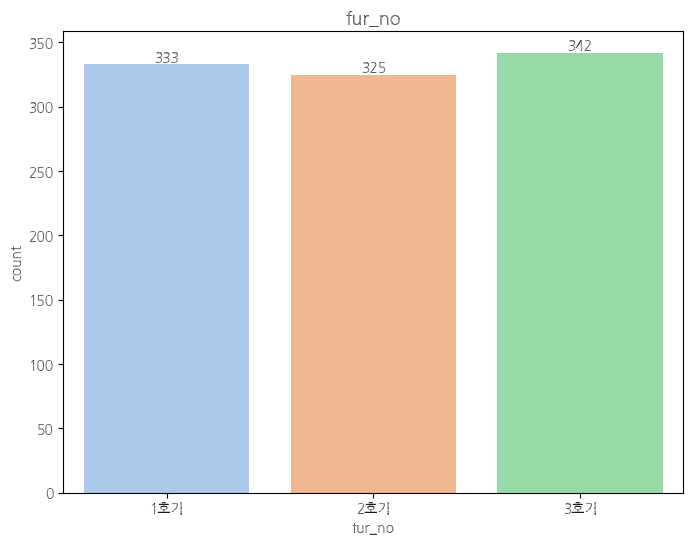

In [56]:
plc_counts = df['fur_no'].value_counts().sort_index()
print(plc_counts)

fig, ax = plt.subplots(figsize=(8, 6))

colors = sns.color_palette("pastel", len(plc_counts))

p6 = sns.countplot(x='fur_no', data=df, ax=ax, palette=colors, order=plc_counts.index)
ax.bar_label(p6.containers[0], fmt='%d') 

ax.set_title('fur_no', fontsize=13)

plt.show()

<Axes: xlabel='fur_no', ylabel='count'>

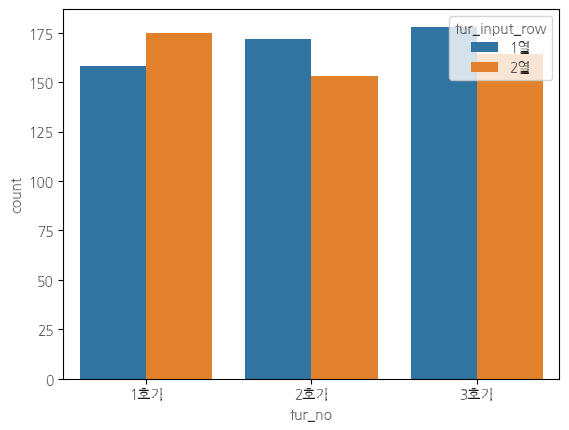

In [59]:
sns.countplot(x='fur_no', hue='fur_input_row', data=df)

1열    508
2열    492
Name: fur_input_row, dtype: int64


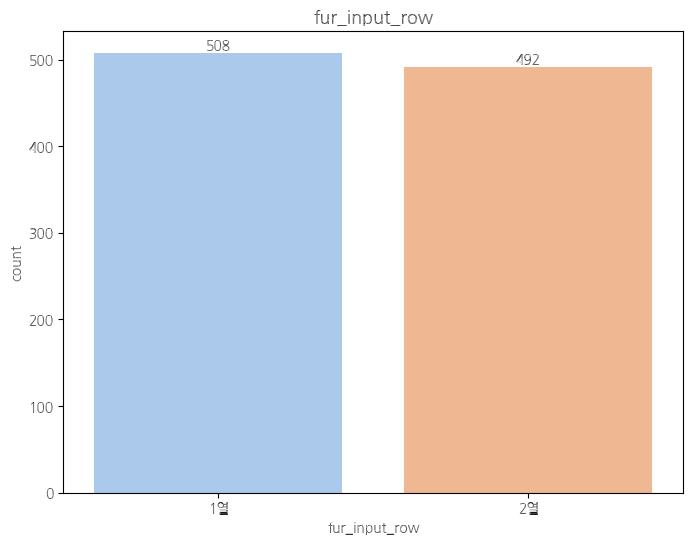

In [57]:
plc_counts = df['fur_input_row'].value_counts().sort_index()
print(plc_counts)

fig, ax = plt.subplots(figsize=(8, 6))

colors = sns.color_palette("pastel", len(plc_counts))

p7 = sns.countplot(x='fur_input_row', data=df, ax=ax, palette=colors, order=plc_counts.index)
ax.bar_label(p7.containers[0], fmt='%d') 

ax.set_title('fur_input_row', fontsize=13)

plt.show()

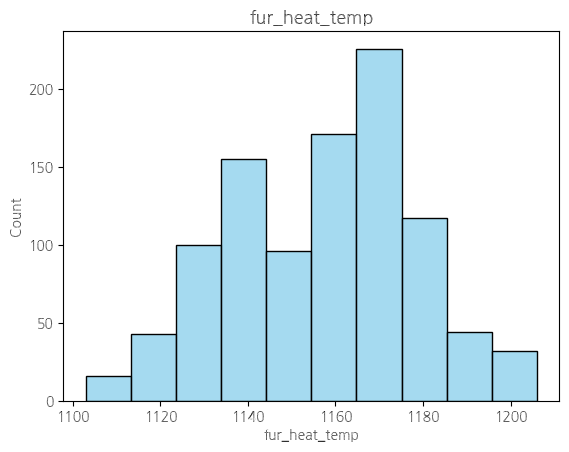

In [63]:
sns.histplot(data=df, x='fur_heat_temp', bins=10,  color="skyblue")
plt.title('fur_heat_temp', fontsize=13)
plt.show()

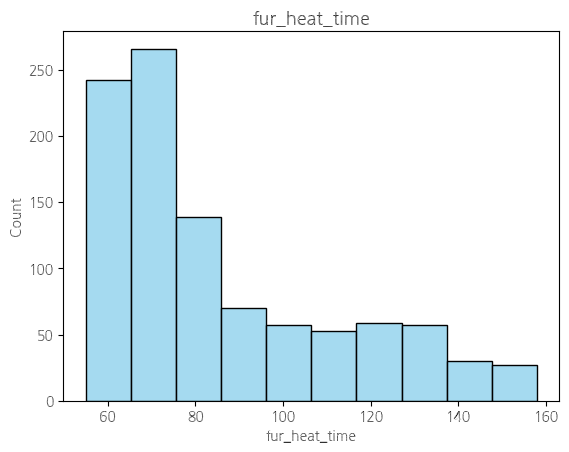

In [62]:
sns.histplot(data=df, x='fur_heat_time', bins=10,  color="skyblue")
plt.title('fur_heat_time', fontsize=13)
plt.show()

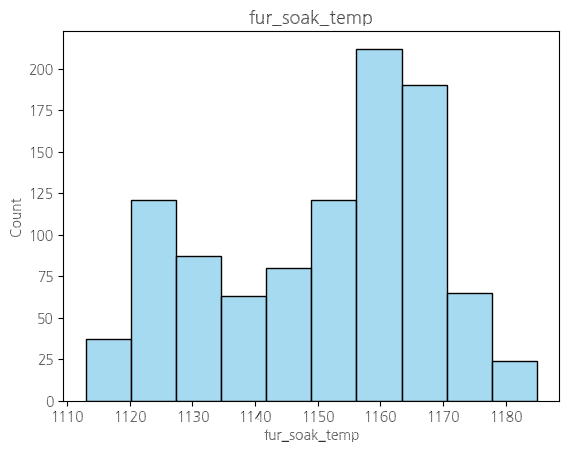

In [65]:
sns.histplot(data=df, x='fur_soak_temp', bins=10,  color="skyblue")
plt.title('fur_soak_temp', fontsize=13)
plt.show()

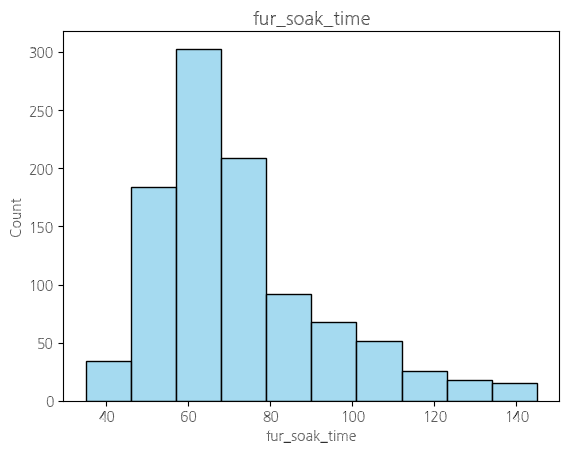

In [66]:
sns.histplot(data=df, x='fur_soak_time', bins=10,  color="skyblue")
plt.title('fur_soak_time', fontsize=13)
plt.show()

CR(제어압연)      840
TMCP(온도제어)    160
Name: rolling_method, dtype: int64


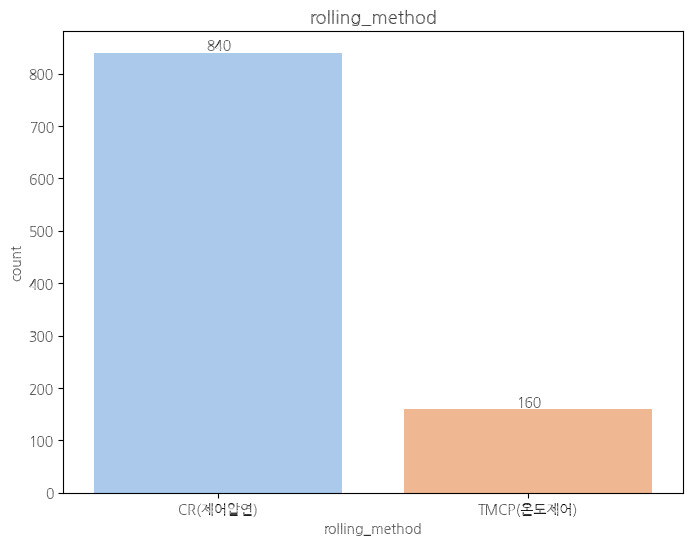

In [67]:
plc_counts = df['rolling_method'].value_counts().sort_index()
print(plc_counts)

fig, ax = plt.subplots(figsize=(8, 6))

colors = sns.color_palette("pastel", len(plc_counts))

p8 = sns.countplot(x='rolling_method', data=df, ax=ax, palette=colors, order=plc_counts.index)
ax.bar_label(p8.containers[0], fmt='%d') 

ax.set_title('rolling_method', fontsize=13)

plt.show()

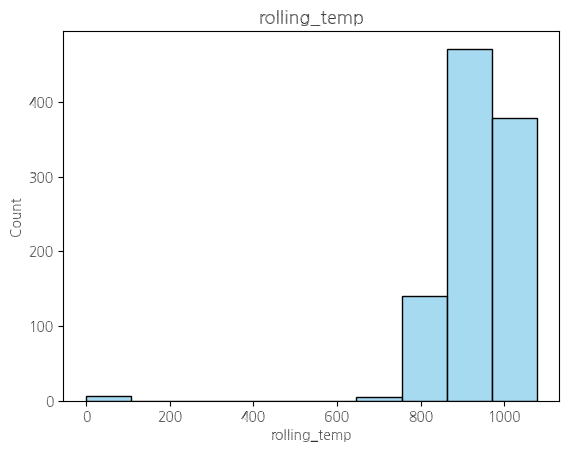

In [68]:
sns.histplot(data=df, x='rolling_temp', bins=10,  color="skyblue")
plt.title('rolling_temp', fontsize=13)
plt.show()

5       6
6     206
7      20
8     249
9      31
10    488
Name: descaling_count, dtype: int64


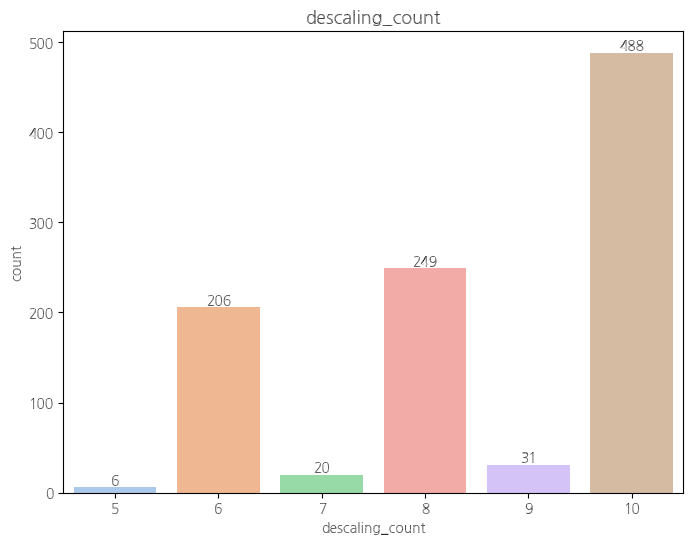

In [70]:
plc_counts = df['descaling_count'].value_counts().sort_index()
print(plc_counts)

fig, ax = plt.subplots(figsize=(8, 6))

colors = sns.color_palette("pastel", len(plc_counts))

p9 = sns.countplot(x='descaling_count', data=df, ax=ax, palette=colors, order=plc_counts.index)
ax.bar_label(p9.containers[0], fmt='%d') 

ax.set_title('descaling_count', fontsize=13)

plt.show()

1조    280
2조    292
3조    218
4조    210
Name: work_group, dtype: int64


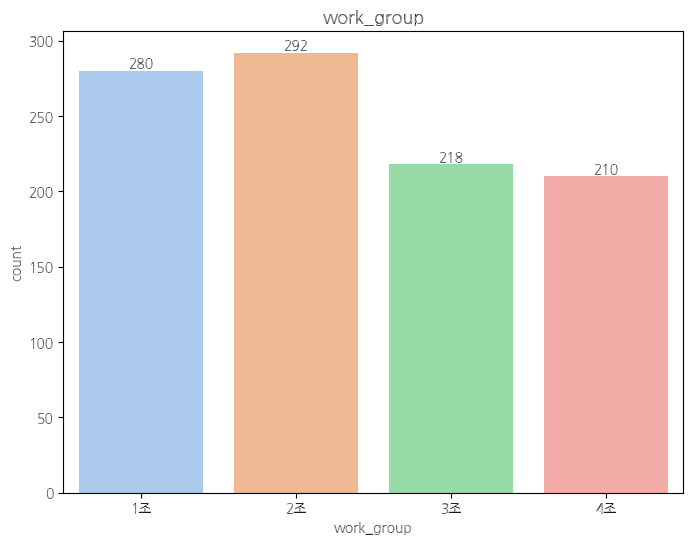

In [71]:
plc_counts = df['work_group'].value_counts().sort_index()
print(plc_counts)

fig, ax = plt.subplots(figsize=(8, 6))

colors = sns.color_palette("pastel", len(plc_counts))

p10 = sns.countplot(x='work_group', data=df, ax=ax, palette=colors, order=plc_counts.index)
ax.bar_label(p10.containers[0], fmt='%d') 

ax.set_title('work_group', fontsize=13)

plt.show()